In [97]:
import pandas as pd
import seaborn as sns
import os

In [98]:
basefolder = '/home/hu-eki/Data/BCNB/experiments'

experiments = os.listdir(basefolder)


In [99]:
experiment = experiments[0]

rounds = os.listdir(os.path.join(basefolder, experiment))
rounds

['20250216_041858',
 '20250216_041631',
 '20250216_044439',
 '20250219_234357',
 '20250216_050921']

In [100]:
all_results = []
for experiment in experiments:
    rounds = os.listdir(os.path.join(basefolder, experiment))
    for round in rounds:
        try:
            df_res = pd.read_csv(os.path.join(basefolder, experiment, round, 'results.csv'))
        except FileNotFoundError:
            print(f'No results for {experiment} round {round}')
            continue
        df_res['experiment'] = experiment
        df_res['round'] = round

        all_results.append(df_res)

df = pd.concat(all_results)

No results for Defaults+train_epochs;1 round 20250219_213557
No results for Defaults+train_epochs;1 round 20250219_213552
No results for Defaults+ round 20250219_101858
No results for Defaults+ round 20250219_102141


In [101]:
list(df.experiment.unique())

experiment_order = [
    'Defaults+train_epochs;0',
    'Defaults+train_epochs;0,stain_normalize_inference;True',
    'Defaults+',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True',
    'Defaults+log1p;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,log1p;True',
    'Defaults+normalize_total;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True',
    'Defaults+normalize_total;True,log1p;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,log1p;True',
    'Defaults+normalize_total;True,normalize_CPM;True,log1p;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,normalize_CPM;True,log1p;True',
    'Defaults+normalize_total;True,normalize_CPM;True,exclude_highly_expressed;True,log1p;True',
    'Defaults+stain_normalize_finetune;True,stain_normalize_inference;True,normalize_total;True,normalize_CPM;True,exclude_highly_expressed;True,log1p;True',
]

In [111]:
df.head()

#df.to_csv('all_results.csv', index=False)

,Model,Seed,Metric,ER,PR,HER2,experiment,round
0,finetuned_model,42,accuracy,0.848624,0.779817,0.752294,Defaults+log1p;True,20250216_041858
1,finetuned_model,42,auc,0.855653,0.793255,0.741772,Defaults+log1p;True,20250216_041858
2,finetuned_model,42,balanced_accuracy,0.761932,0.691762,0.601688,Defaults+log1p;True,20250216_041858
0,finetuned_model,42,accuracy,0.839450,0.798165,0.761468,Defaults+log1p;True,20250216_041631
1,finetuned_model,42,auc,0.858665,0.812572,0.772046,Defaults+log1p;True,20250216_041631


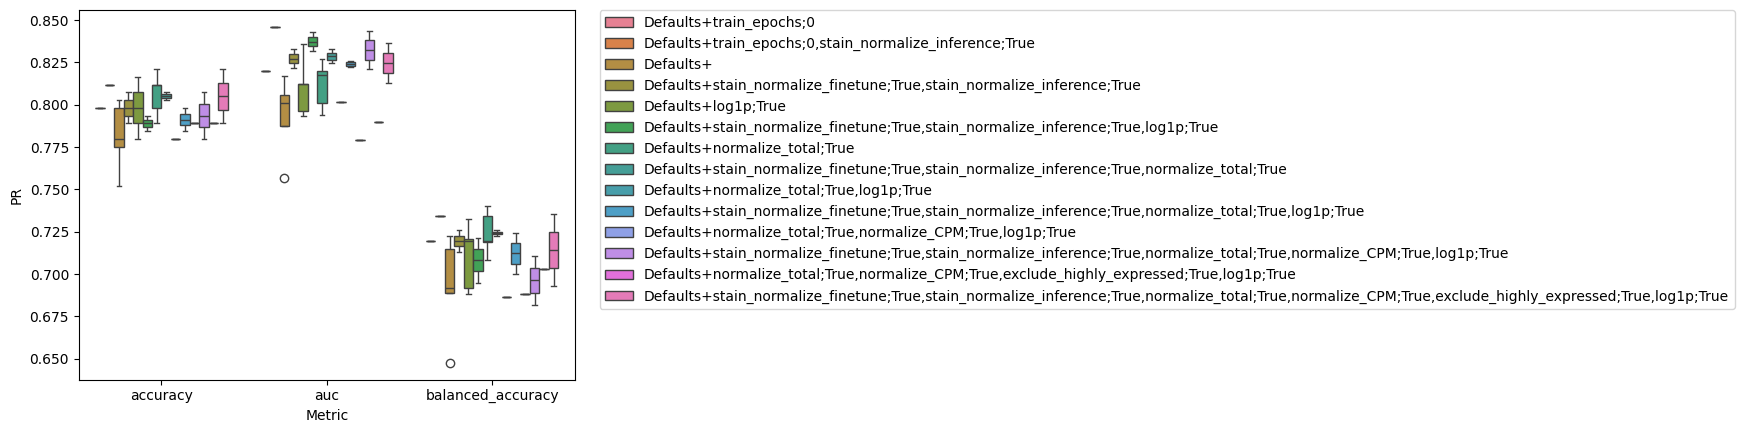

In [103]:
import matplotlib.pyplot as plt
sns.boxplot(data=df, x='Metric', y='PR', hue='experiment', hue_order=experiment_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

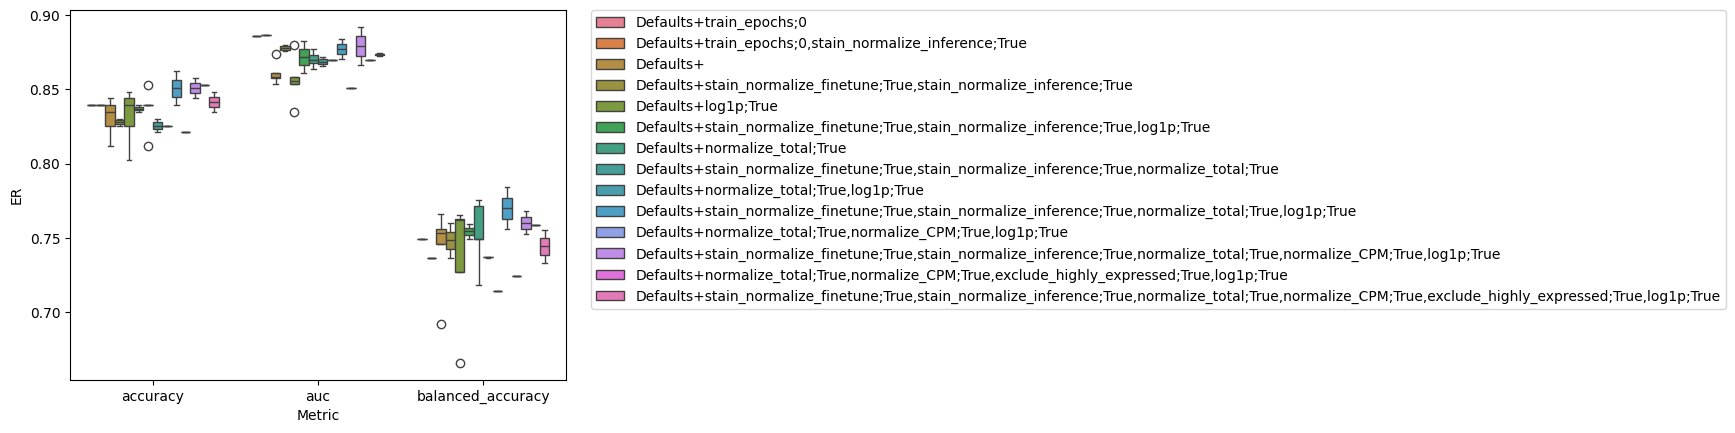

In [104]:
sns.boxplot(data=df, x='Metric', y='ER', hue='experiment', hue_order=experiment_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

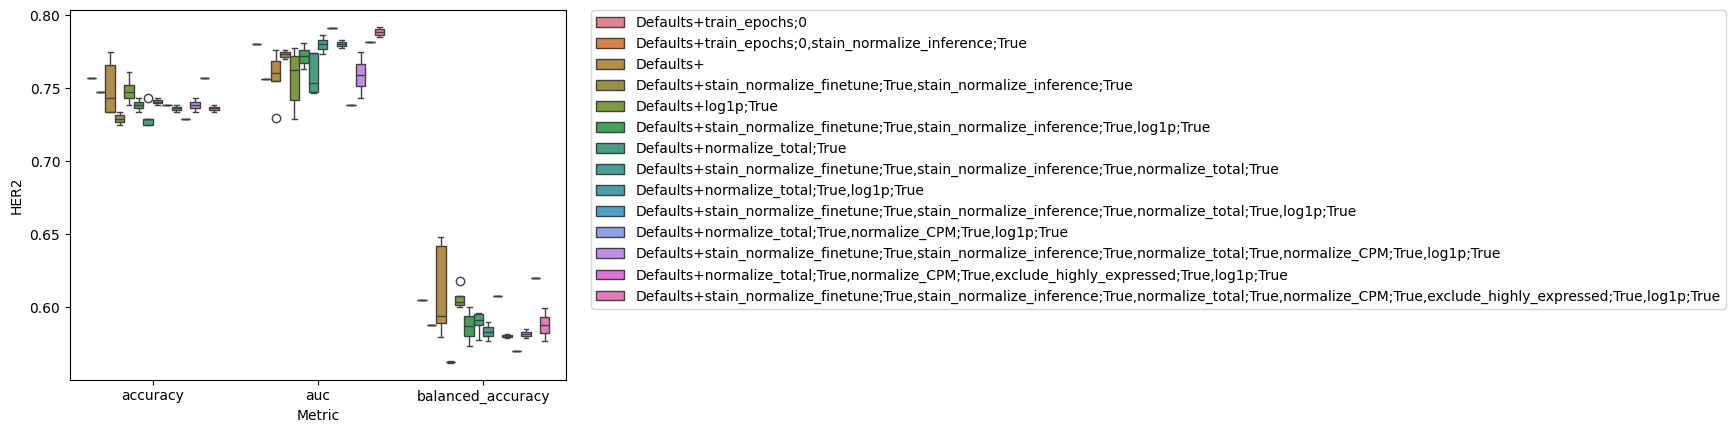

In [105]:
sns.boxplot(data=df, x='Metric', y='HER2', hue='experiment', hue_order=experiment_order)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

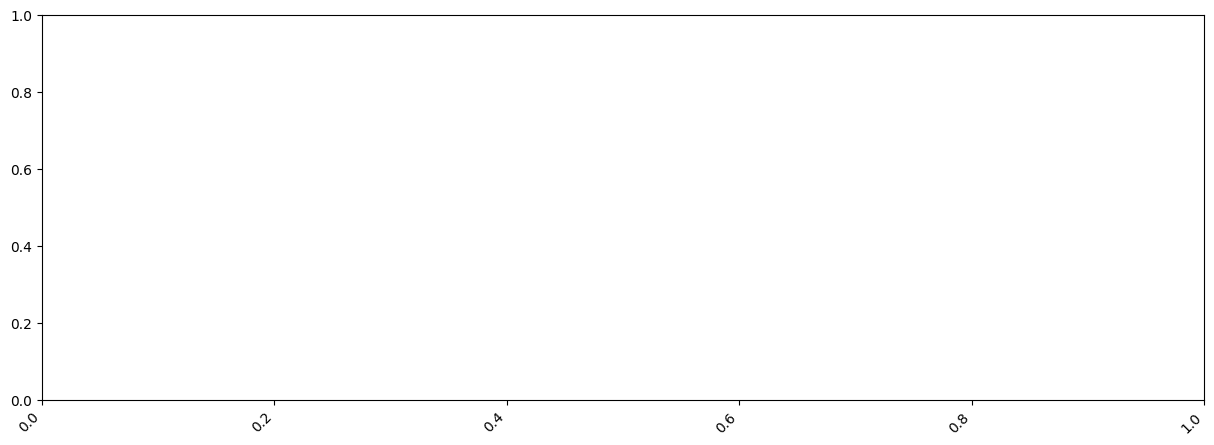

In [ ]:
df_long = df.melt(id_vars=['Model', 'Seed', 'Metric', 'experiment', 'round'], var_name='target_variable', value_name='score')

fig = plt.figure(figsize=(15, 5))
sns.boxplot(data=df_long[df_long.Metric == 'balanced_accuracy'], x='experiment', y='score', hue='target_variable', order=experiment_order)
plt.xticks(rotation=45, ha='right')